# 감정 인식 데이터

## 패키지 로드 및 디렉토리 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/data/dataset

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics, callbacks
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import cv2
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd

In [ ]:
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

## 데이터 로드 및 분할

In [ ]:
categories = os.listdir()[:-5]
num_labels = len(categories)
categories

In [ ]:
image_w = 100
image_h = 100
  
X = []
Y = []
  
for idex, categorie in enumerate(categories):
    label = idex
    image_dir = categorie + '/'
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            img = cv2.imread(image_dir+filename) # cv2.IMREAD_GRAYSCALE : 흑백 처리
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst = img) # RGB 변환
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
            X.append(img/255)
            Y.append(label)
 
X = np.array(X)
Y = np.array(Y)
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(X_train, Y_train, 
                                                                      test_size=0.1, random_state=42)

## CNN 모델 사용

In [ ]:
model = keras.Sequential() # 순서대로 구조 정의
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', 
                              padding = 'same', input_shape = train_input.shape[1:]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(len(categories), activation = 'softmax'))

model.summary()

In [ ]:
batch_size = 32
epochs = 50

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_input, train_target, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb=callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb=callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(train_input, train_target, batch_size=batch_size, epochs = epochs,
                        shuffle=True, validation_data=(val_input, val_target),
                        steps_per_epoch = steps_per_epoch,
                        callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_input,val_target)

## 테스트 데이터 사용 및 결과 확인

In [ ]:
X_test.shape, Y_test.shape

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, 1)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, y_pred, target_names = categories, output_dict = True)
df_report = pd.DataFrame(report).transpose()

In [ ]:
df_report

- 데이터의 수가 부족해서 다소 부정확한 결과 도출

# Cifar10 데이터

## 패키지 로드 및 전처리

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, Input
from keras.models import Model
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers, initializers, regularizers, metrics, callbacks
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [2]:
cifar10 = datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
x = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels, test_labels))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42) # train / test 분할

In [7]:
train_input, val_input, train_target, val_target = train_test_split(x_train, y_train, test_size = 0.1,
                                                                    random_state = 42) # train / val 분할

In [8]:
print(train_input.shape, train_target.shape, val_input.shape, val_target.shape)

(48600, 32, 32, 3) (48600, 1) (5400, 32, 32, 3) (5400, 1)


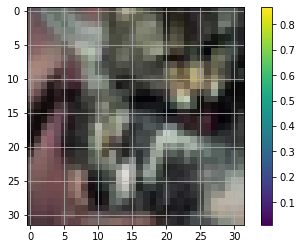

In [9]:
plt.figure()
plt.imshow(train_input[0])
plt.colorbar()
plt.grid(True)
plt.show()

## 최적의 dropout 탐색 및 모델 실행

In [10]:
batch_size = 32
num_classes = len(np.unique(train_target))
epochs = 50
lr = 1e-5
lr_weight_decay = 0.95

train_target = np_utils.to_categorical(train_target, num_classes) # one-hot vector로 변환
val_target = np_utils.to_categorical(val_target, num_classes)

In [12]:
from keras import initializers
import copy

result = {}
y = {}
loss = []
accuracy = []

dropouts = [num/10 for num in range(8)]

for dropout in dropouts:
    print("Dropout : ", (dropout))
    model = Sequential()

    # layer 1
    model.add(Conv2D(64, 3, padding='same', activation='relu',input_shape=(train_input.shape[1:])))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 2
    model.add(Conv2D(128, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 3                         
    model.add(Conv2D(256, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    # layer 5
    model.add(Dense(512, activation='relu'))

    # layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)

    early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights = True)

    history = model.fit(train_input, train_target, batch_size=batch_size, epochs =epochs, verbose=1, 
                        shuffle=True, validation_data=(val_input, val_target),
                        callbacks = [checkpoint_cb, early_stopping_cb])
    
    score = model.evaluate(val_input, val_target, verbose=0)
    y[dropout] = model.predict(val_input)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(history.history)   
    loss.append(score[0])
    accuracy.append(score[1])

Dropout :  0.0
Epoch 1/50
1519/1519 [==============================] - 17s 5ms/step - loss: 1.3694 - accuracy: 0.4975 - val_loss: 0.9586 - val_accuracy: 0.6554
Epoch 2/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.8536 - accuracy: 0.7015 - val_loss: 0.7971 - val_accuracy: 0.7180
Epoch 3/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.6504 - accuracy: 0.7726 - val_loss: 0.7317 - val_accuracy: 0.7511
Epoch 4/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.5148 - accuracy: 0.8199 - val_loss: 0.7727 - val_accuracy: 0.7480
Epoch 5/50
169/169 [==============================] - 0s 2ms/step
Test score: 0.7316938638687134
Test accuracy: 0.7511110901832581
Dropout :  0.1
Epoch 1/50
1519/1519 [==============================] - 9s 5ms/step - loss: 1.4285 - accuracy: 0.4755 - val_loss: 1.0362 - val_accuracy: 0.6226
Epoch 2/50
1519/1519 [==============================] - 7s 5ms/step - loss: 0.9270 - accuracy: 0.6722 - val_loss: 1.00

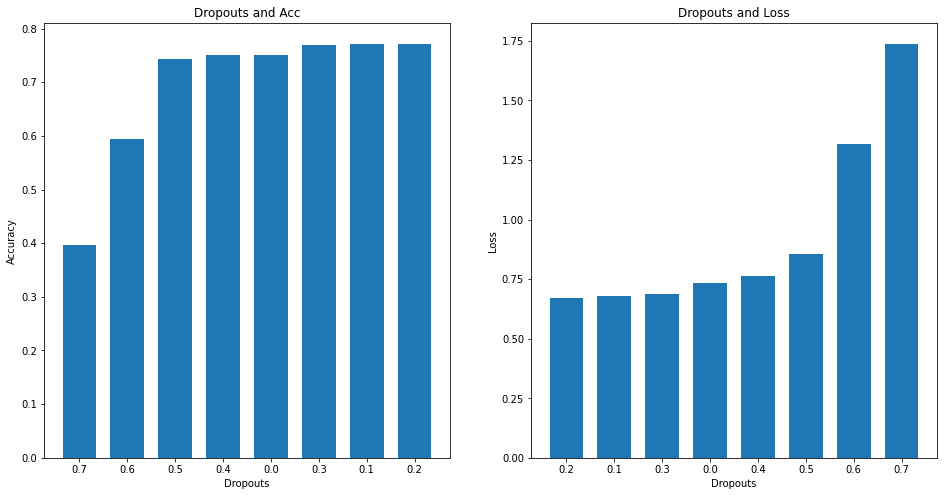

In [15]:
x = dropouts
x = list(map(str, x))
y = accuracy
z = loss

df = pd.DataFrame(
    dict(
        Dropouts = x,
        accuracy = y,
        loss = z
    )
)

acc_sorted = df.sort_values('accuracy')
loss_sorted = df.sort_values('loss')

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.bar('Dropouts','accuracy', data = acc_sorted, width = 0.7)
plt.xlabel('Dropouts')
plt.ylabel('Accuracy')
plt.title('Dropouts and Acc')

plt.subplot(1,2,2)
plt.bar('Dropouts', 'loss', data = loss_sorted, width = 0.7)
plt.xlabel('Dropouts')
plt.ylabel('Loss')
plt.title('Dropouts and Loss')

plt.show()

- accuracy와 loss를 모두 고려했을 때 dropout 0.2으로 모델 제작

## 평가 지표 향상을 위한 모델 변형

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [18]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1,
                                    horizontal_flip = True)

train_generator = data_generator.flow(train_input, train_target, batch_size)
steps_per_epoch = train_input.shape[0] // batch_size

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights = True)

history = model.fit(train_input, train_target, batch_size=batch_size, epochs = epochs,
                        shuffle=True, validation_data=(val_input, val_target),
                        steps_per_epoch = steps_per_epoch,
                        callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
1518/1518 [==============================] - 11s 6ms/step - loss: 1.4589 - accuracy: 0.4779 - val_loss: 1.1022 - val_accuracy: 0.6002
Epoch 2/50
1518/1518 [==============================] - 9s 6ms/step - loss: 1.0212 - accuracy: 0.6419 - val_loss: 0.8888 - val_accuracy: 0.6854
Epoch 3/50
1518/1518 [==============================] - 9s 6ms/step - loss: 0.8535 - accuracy: 0.7049 - val_loss: 0.8056 - val_accuracy: 0.7293
Epoch 4/50
1518/1518 [==============================] - 9s 6ms/step - loss: 0.7511 - accuracy: 0.7412 - val_loss: 0.8390 - val_accuracy: 0.7287
Epoch 5/50
1518/1518 [==============================] - 9s 6ms/step - loss: 0.6696 - accuracy: 0.7713 - val_loss: 0.7063 - val_accuracy: 0.7693
Epoch 6/50
1518/1518 [==============================] - 9s 6ms/step - loss: 0.6048 - accuracy: 0.7943 - val_loss: 0.6030 - val_accuracy: 0.7967
Epoch 7/50
1518/1518 [==============================] - 9s 6ms/step - loss: 0.5546 - accuracy: 0.8102 - val_loss: 0.8108 - val_accuracy

## 결과 확인

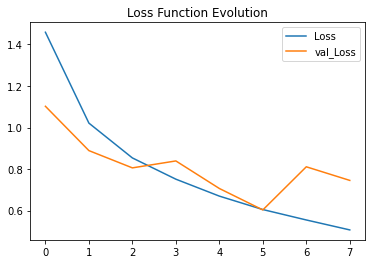

In [20]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()
plt.show()

In [21]:
model.evaluate(val_input, val_target)

169/169 [==============================] - 1s 3ms/step - loss: 0.6030 - accuracy: 0.7967


[0.6030204892158508, 0.79666668176651]

## 테스트 데이터 사용

In [22]:
x_test.shape, y_test.shape

((6000, 32, 32, 3), (6000, 1))

In [23]:
y_pred = model.predict(x_test)

188/188 [==============================] - 1s 3ms/step


In [26]:
y_pred = np.argmax(y_pred,1)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

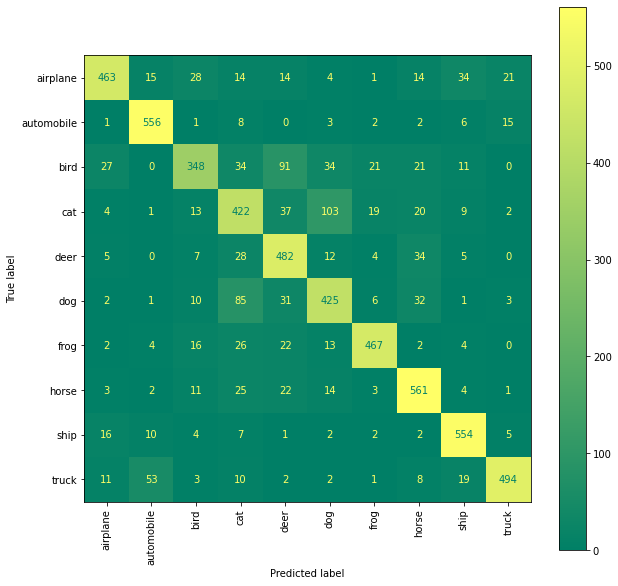

In [28]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names = labels, output_dict = True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
airplane,0.867041,0.761513,0.810858,608.000000
automobile,0.866044,0.936027,0.899676,594.000000
bird,0.789116,0.592845,0.677043,587.000000
cat,0.640364,0.669841,0.654771,630.000000
deer,0.686610,0.835355,0.753714,577.000000
dog,0.694444,0.713087,0.703642,596.000000
frog,0.887833,0.839928,0.863216,556.000000
horse,0.806034,0.868421,0.836066,646.000000
ship,0.856260,0.918740,0.886400,603.000000
truck,0.913124,0.819237,0.863636,603.000000


## DenseNet model 사용

In [ ]:
from keras.applications.densenet import DenseNet121

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(num_classes, activation='softmax'))
model.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 7,047,754
Trainable params: 6,964,106
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights = True)

history = model.fit(train_input, train_target, batch_size=batch_size, epochs = epochs,
                        shuffle=True, validation_data=(val_input, val_target),
                        steps_per_epoch = steps_per_epoch,
                        callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
1518/1518 [==============================] - 102s 59ms/step - loss: 1.2569 - accuracy: 0.5833 - val_loss: 2.6046 - val_accuracy: 0.5111
Epoch 2/50
1518/1518 [==============================] - 84s 54ms/step - loss: 0.9517 - accuracy: 0.6804 - val_loss: 1.1669 - val_accuracy: 0.6248
Epoch 3/50
1518/1518 [==============================] - 82s 54ms/step - loss: 0.8526 - accuracy: 0.7165 - val_loss: 0.8355 - val_accuracy: 0.7139
Epoch 4/50
1518/1518 [==============================] - 88s 58ms/step - loss: 1.3395 - accuracy: 0.5515 - val_loss: 1.7756 - val_accuracy: 0.5335
Epoch 5/50
1518/1518 [==============================] - 84s 55ms/step - loss: 1.1403 - accuracy: 0.6079 - val_loss: 20.8080 - val_accuracy: 0.3385


- DenseNet 모델을 사용해봤으나, 성능이 좋지 않음. 모델에 대한 이해도가 부족해서 그런거 같다.

- https://deep-learning-study.tistory.com/528